In [3]:
print ()'Hello')

Hello


In [4]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mediapipe in c:\users\aditya\appdata\local\programs\python\python36\lib\site-packages (0.8.3)



# Import and Install Dependencies

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

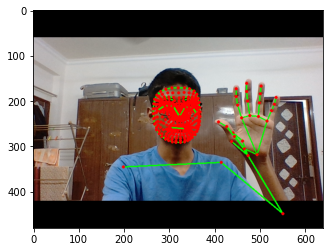

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [15]:
len(results.left_hand_landmarks.landmark)

21

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

IndentationError: unexpected indent (<ipython-input-18-3fe2adb7da0b>, line 2)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.50489241,  0.48859787, -0.41671914, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
468*3+33*4+21*3+21*3

1662

In [24]:
np.save('0', result_test)

In [25]:
np.load('0.npy')

array([ 0.50489241,  0.48859787, -0.41671914, ...,  0.        ,
        0.        ,  0.        ])

# Setup Folders for Collection

In [26]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [27]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [29]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [30]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map = {label:num for num, label in enumerate(actions)}

In [36]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

# sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "0.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [39]:
np.array(sequences).shape

(90, 30, 1662)

In [40]:

np.array(labels).shape

(90,)

In [41]:
X = np.array(sequences)

In [42]:
X.shape

(90, 30, 1662)

In [43]:
y = to_categorical(labels).astype(int)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [45]:
y_test.shape

(5, 3)

# Build and Train LSTM Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [47]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [48]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [49]:
res = [.7, 0.2, 0.1]

In [50]:
actions[np.argmax(res)]

'hello'

In [51]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 9s 638ms/step - loss: 1.2209 - categorical_accuracy: 0.3698
Epoch 2/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.1520 - categorical_accuracy: 0.3249
Epoch 3/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.2215 - categorical_accuracy: 0.3034
Epoch 4/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.1885 - categorical_accuracy: 0.3679
Epoch 5/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0872 - categorical_accuracy: 0.3854
Epoch 6/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0569 - categorical_accuracy: 0.3425
Epoch 7/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0084 - categorical_accuracy: 0.3405
Epoch 8/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.9901 - categorical_accuracy: 0.3581
Epoch 9/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.1316 - categorical_accuracy:

3/3 [==============================] - 0s 132ms/step - loss: 1.0859 - categorical_accuracy: 0.3425
Epoch 74/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0830 - categorical_accuracy: 0.3620
Epoch 75/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.0830 - categorical_accuracy: 0.3268
Epoch 76/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.0621 - categorical_accuracy: 0.3776
Epoch 77/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.0757 - categorical_accuracy: 0.3151
Epoch 78/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.0433 - categorical_accuracy: 0.3483
Epoch 79/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0350 - categorical_accuracy: 0.3483
Epoch 80/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0803 - categorical_accuracy: 0.3798
Epoch 81/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.0418 - categorical_accuracy: 0.46

3/3 [==============================] - 0s 148ms/step - loss: 0.5734 - categorical_accuracy: 0.7416
Epoch 146/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.5048 - categorical_accuracy: 0.7553
Epoch 147/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.5954 - categorical_accuracy: 0.7319
Epoch 148/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.6424 - categorical_accuracy: 0.6438
Epoch 149/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.6753 - categorical_accuracy: 0.6537
Epoch 150/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.6344 - categorical_accuracy: 0.6438
Epoch 151/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.5338 - categorical_accuracy: 0.7515
Epoch 152/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5286 - categorical_accuracy: 0.7045
Epoch 153/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.7627 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.3979 - categorical_accuracy: 0.8180
Epoch 218/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.5742 - categorical_accuracy: 0.7612
Epoch 219/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5949 - categorical_accuracy: 0.8004
Epoch 220/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.5871 - categorical_accuracy: 0.7261
Epoch 221/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.6265 - categorical_accuracy: 0.7574
Epoch 222/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.8385 - categorical_accuracy: 0.6359
Epoch 223/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5284 - categorical_accuracy: 0.7377
Epoch 224/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.5162 - categorical_accuracy: 0.7750
Epoch 225/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5938 - cat

3/3 [==============================] - 0s 136ms/step - loss: 0.2180 - categorical_accuracy: 0.9295
Epoch 289/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.1319 - categorical_accuracy: 0.9569
Epoch 290/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.4505 - categorical_accuracy: 0.8650
Epoch 291/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.2215 - categorical_accuracy: 0.9119
Epoch 292/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.2831 - categorical_accuracy: 0.9040
Epoch 293/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.3464 - categorical_accuracy: 0.8688
Epoch 294/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.2390 - categorical_accuracy: 0.9256
Epoch 295/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.2285 - categorical_accuracy: 0.9315
Epoch 296/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.2289 - categorical_accura

Epoch 360/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.2287 - categorical_accuracy: 0.9217
Epoch 361/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.2372 - categorical_accuracy: 0.9276
Epoch 362/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.1878 - categorical_accuracy: 0.9491
Epoch 363/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1405 - categorical_accuracy: 0.9628
Epoch 364/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.1632 - categorical_accuracy: 0.9452
Epoch 365/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.1371 - categorical_accuracy: 0.9628
Epoch 366/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1447 - categorical_accuracy: 0.9530
Epoch 367/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.1213 - categorical_accuracy: 0.9589
Epoch 368/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.1533 - cat

3/3 [==============================] - 0s 132ms/step - loss: 0.2237 - categorical_accuracy: 0.9393
Epoch 432/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.2444 - categorical_accuracy: 0.9315
Epoch 433/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1761 - categorical_accuracy: 0.9511
Epoch 434/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.2036 - categorical_accuracy: 0.9432
Epoch 435/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.2633 - categorical_accuracy: 0.9374
Epoch 436/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.2254 - categorical_accuracy: 0.9276
Epoch 437/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.1900 - categorical_accuracy: 0.9491
Epoch 438/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1596 - categorical_accuracy: 0.9706
Epoch 439/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.2369 - categorical_accura

Epoch 503/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.1195 - categorical_accuracy: 0.9608
Epoch 504/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.0864 - categorical_accuracy: 0.9648
Epoch 505/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.1018 - categorical_accuracy: 0.9706
Epoch 506/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1148 - categorical_accuracy: 0.9530
Epoch 507/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.3630 - categorical_accuracy: 0.8533
Epoch 508/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3712 - categorical_accuracy: 0.8631
Epoch 509/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.1769 - categorical_accuracy: 0.9276
Epoch 510/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1645 - categorical_accuracy: 0.9432
Epoch 511/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.1191 - cat

3/3 [==============================] - 0s 140ms/step - loss: 1.3196 - categorical_accuracy: 0.3092
Epoch 575/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.4346 - categorical_accuracy: 0.2544
Epoch 576/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.4138 - categorical_accuracy: 0.3072
Epoch 577/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.3402 - categorical_accuracy: 0.3855
Epoch 578/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.6235 - categorical_accuracy: 0.3112
Epoch 579/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.3521 - categorical_accuracy: 0.3679
Epoch 580/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.4401 - categorical_accuracy: 0.2760
Epoch 581/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.2965 - categorical_accuracy: 0.3562
Epoch 582/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.5169 - categorical_accura

Epoch 646/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.1250 - categorical_accuracy: 0.3033
Epoch 647/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.1376 - categorical_accuracy: 0.3171
Epoch 648/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.1151 - categorical_accuracy: 0.2896
Epoch 649/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.0343 - categorical_accuracy: 0.3895
Epoch 650/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.1001 - categorical_accuracy: 0.4206
Epoch 651/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.0673 - categorical_accuracy: 0.3249
Epoch 652/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.1023 - categorical_accuracy: 0.4756
Epoch 653/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.0960 - categorical_accuracy: 0.3053
Epoch 654/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0507 - cat

3/3 [==============================] - 0s 136ms/step - loss: 1.0053 - categorical_accuracy: 0.4403
Epoch 718/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0271 - categorical_accuracy: 0.4599
Epoch 719/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.0240 - categorical_accuracy: 0.3835
Epoch 720/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0858 - categorical_accuracy: 0.3386
Epoch 721/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.0019 - categorical_accuracy: 0.4364
Epoch 722/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0729 - categorical_accuracy: 0.2662
Epoch 723/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.0287 - categorical_accuracy: 0.4873
Epoch 724/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.0233 - categorical_accuracy: 0.4109
Epoch 725/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0202 - categorical_accura

Epoch 789/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0061 - categorical_accuracy: 0.4130
Epoch 790/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.9865 - categorical_accuracy: 0.5166
Epoch 791/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.9921 - categorical_accuracy: 0.4462
Epoch 792/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.9583 - categorical_accuracy: 0.6046
Epoch 793/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.9644 - categorical_accuracy: 0.4697
Epoch 794/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.9490 - categorical_accuracy: 0.4872
Epoch 795/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0285 - categorical_accuracy: 0.5087
Epoch 796/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.0179 - categorical_accuracy: 0.4090
Epoch 797/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.9909 - cat

3/3 [==============================] - 0s 130ms/step - loss: 1.4409 - categorical_accuracy: 0.3679
Epoch 861/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.2626 - categorical_accuracy: 0.3465
Epoch 862/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.1370 - categorical_accuracy: 0.3562
Epoch 863/2000
3/3 [==============================] - 1s 224ms/step - loss: 1.1265 - categorical_accuracy: 0.3229
Epoch 864/2000
3/3 [==============================] - 1s 174ms/step - loss: 1.0350 - categorical_accuracy: 0.4247
Epoch 865/2000
3/3 [==============================] - 1s 178ms/step - loss: 1.0694 - categorical_accuracy: 0.3307
Epoch 866/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0564 - categorical_accuracy: 0.5146
Epoch 867/2000
3/3 [==============================] - 1s 168ms/step - loss: 1.0607 - categorical_accuracy: 0.4364
Epoch 868/2000
3/3 [==============================] - 1s 204ms/step - loss: 1.0618 - categorical_accura

Epoch 932/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0051 - categorical_accuracy: 0.4756
Epoch 933/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.9974 - categorical_accuracy: 0.4304
Epoch 934/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.9917 - categorical_accuracy: 0.4618
Epoch 935/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.9896 - categorical_accuracy: 0.5107
Epoch 936/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.9937 - categorical_accuracy: 0.4031
Epoch 937/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.9925 - categorical_accuracy: 0.4893
Epoch 938/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.9887 - categorical_accuracy: 0.5499
Epoch 939/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0114 - categorical_accuracy: 0.4384
Epoch 940/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.9836 - cat

3/3 [==============================] - 0s 126ms/step - loss: 1.0251 - categorical_accuracy: 0.4540
Epoch 1004/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.9949 - categorical_accuracy: 0.4265
Epoch 1005/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.9713 - categorical_accuracy: 0.3994
Epoch 1006/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0550 - categorical_accuracy: 0.5499
Epoch 1007/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.9537 - categorical_accuracy: 0.5186
Epoch 1008/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.9816 - categorical_accuracy: 0.4657
Epoch 1009/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.9404 - categorical_accuracy: 0.4951
Epoch 1010/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.9242 - categorical_accuracy: 0.6027
Epoch 1011/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.9584 - categorica

3/3 [==============================] - 0s 126ms/step - loss: 0.8662 - categorical_accuracy: 0.5205
Epoch 1075/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.8412 - categorical_accuracy: 0.4951
Epoch 1076/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.8147 - categorical_accuracy: 0.6066
Epoch 1077/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.9799 - categorical_accuracy: 0.4932
Epoch 1078/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.9906 - categorical_accuracy: 0.4756
Epoch 1079/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.8812 - categorical_accuracy: 0.5851
Epoch 1080/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.9177 - categorical_accuracy: 0.4736
Epoch 1081/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.9627 - categorical_accuracy: 0.4991
Epoch 1082/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.8342 - categorica

3/3 [==============================] - 0s 123ms/step - loss: 0.8193 - categorical_accuracy: 0.5929
Epoch 1146/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.8197 - categorical_accuracy: 0.6027
Epoch 1147/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.7956 - categorical_accuracy: 0.6634
Epoch 1148/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.8154 - categorical_accuracy: 0.5655
Epoch 1149/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.7874 - categorical_accuracy: 0.6497
Epoch 1150/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.7786 - categorical_accuracy: 0.5813
Epoch 1151/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.7996 - categorical_accuracy: 0.6047
Epoch 1152/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.7555 - categorical_accuracy: 0.6536
Epoch 1153/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.7804 - categorica

3/3 [==============================] - 0s 124ms/step - loss: 1.0772 - categorical_accuracy: 0.4892
Epoch 1217/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0816 - categorical_accuracy: 0.4756
Epoch 1218/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.1927 - categorical_accuracy: 0.3248
Epoch 1219/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.0961 - categorical_accuracy: 0.3601
Epoch 1220/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.1691 - categorical_accuracy: 0.3132
Epoch 1221/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.1328 - categorical_accuracy: 0.3523
Epoch 1222/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.1220 - categorical_accuracy: 0.3640
Epoch 1223/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.1033 - categorical_accuracy: 0.3366
Epoch 1224/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0775 - categorica

3/3 [==============================] - 0s 119ms/step - loss: 1.0307 - categorical_accuracy: 0.5401
Epoch 1288/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.0391 - categorical_accuracy: 0.3797
Epoch 1289/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.0313 - categorical_accuracy: 0.3464
Epoch 1290/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0342 - categorical_accuracy: 0.3327
Epoch 1291/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.0243 - categorical_accuracy: 0.3366
Epoch 1292/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0098 - categorical_accuracy: 0.3718
Epoch 1293/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.0149 - categorical_accuracy: 0.3718
Epoch 1294/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.0190 - categorical_accuracy: 0.3738
Epoch 1295/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.9953 - categorica

3/3 [==============================] - 0s 140ms/step - loss: 0.9357 - categorical_accuracy: 0.6046
Epoch 1359/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.9504 - categorical_accuracy: 0.5890
Epoch 1360/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.9248 - categorical_accuracy: 0.5988
Epoch 1361/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.9528 - categorical_accuracy: 0.5831
Epoch 1362/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.9562 - categorical_accuracy: 0.5578
Epoch 1363/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.9244 - categorical_accuracy: 0.5676
Epoch 1364/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.9507 - categorical_accuracy: 0.5676
Epoch 1365/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.9450 - categorical_accuracy: 0.5773
Epoch 1366/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.9418 - categorica

3/3 [==============================] - 0s 136ms/step - loss: 0.9026 - categorical_accuracy: 0.6320
Epoch 1430/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.8866 - categorical_accuracy: 0.5342
Epoch 1431/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.8825 - categorical_accuracy: 0.5949
Epoch 1432/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.8953 - categorical_accuracy: 0.5871
Epoch 1433/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.9137 - categorical_accuracy: 0.5382
Epoch 1434/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.9085 - categorical_accuracy: 0.5324
Epoch 1435/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.8954 - categorical_accuracy: 0.6007
Epoch 1436/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.8902 - categorical_accuracy: 0.5733
Epoch 1437/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.8994 - categorica

3/3 [==============================] - 0s 136ms/step - loss: 0.9219 - categorical_accuracy: 0.4717
Epoch 1501/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.8742 - categorical_accuracy: 0.6007
Epoch 1502/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.8672 - categorical_accuracy: 0.6105
Epoch 1503/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.8850 - categorical_accuracy: 0.5069
Epoch 1504/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.8885 - categorical_accuracy: 0.5851
Epoch 1505/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.9007 - categorical_accuracy: 0.6125
Epoch 1506/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.8869 - categorical_accuracy: 0.5030
Epoch 1507/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.8745 - categorical_accuracy: 0.6028
Epoch 1508/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.8484 - categorica

3/3 [==============================] - 0s 136ms/step - loss: 0.8188 - categorical_accuracy: 0.5871
Epoch 1572/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.7975 - categorical_accuracy: 0.6555
Epoch 1573/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.8160 - categorical_accuracy: 0.6458
Epoch 1574/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.8145 - categorical_accuracy: 0.5695
Epoch 1575/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.8243 - categorical_accuracy: 0.6380
Epoch 1576/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.8259 - categorical_accuracy: 0.5519
Epoch 1577/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.8135 - categorical_accuracy: 0.6634
Epoch 1578/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.8105 - categorical_accuracy: 0.6810
Epoch 1579/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.8143 - categorica

3/3 [==============================] - 0s 149ms/step - loss: 0.7887 - categorical_accuracy: 0.6536
Epoch 1643/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.7209 - categorical_accuracy: 0.6399
Epoch 1644/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.7232 - categorical_accuracy: 0.6692
Epoch 1645/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.7357 - categorical_accuracy: 0.6869
Epoch 1646/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.7315 - categorical_accuracy: 0.6458
Epoch 1647/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.7423 - categorical_accuracy: 0.6204
Epoch 1648/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.7556 - categorical_accuracy: 0.6262
Epoch 1649/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.6971 - categorical_accuracy: 0.6595
Epoch 1650/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.7673 - categorica

3/3 [==============================] - 0s 117ms/step - loss: 0.6652 - categorical_accuracy: 0.6067
Epoch 1714/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6351 - categorical_accuracy: 0.6438
Epoch 1715/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5984 - categorical_accuracy: 0.7201
Epoch 1716/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6258 - categorical_accuracy: 0.6830
Epoch 1717/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6455 - categorical_accuracy: 0.6771
Epoch 1718/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6336 - categorical_accuracy: 0.6928
Epoch 1719/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.5900 - categorical_accuracy: 0.7261
Epoch 1720/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6077 - categorical_accuracy: 0.5969
Epoch 1721/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.5699 - categorica

3/3 [==============================] - 0s 101ms/step - loss: 0.5737 - categorical_accuracy: 0.7691
Epoch 1785/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.5863 - categorical_accuracy: 0.7378
Epoch 1786/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.5020 - categorical_accuracy: 0.7847
Epoch 1787/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5586 - categorical_accuracy: 0.7534
Epoch 1788/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5340 - categorical_accuracy: 0.7397
Epoch 1789/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6455 - categorical_accuracy: 0.7182
Epoch 1790/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.1071 - categorical_accuracy: 0.4971
Epoch 1791/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.9106 - categorical_accuracy: 0.6653
Epoch 1792/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.2587 - categorica

3/3 [==============================] - 0s 107ms/step - loss: 0.5202 - categorical_accuracy: 0.7867
Epoch 1856/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.5190 - categorical_accuracy: 0.7574
Epoch 1857/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.5206 - categorical_accuracy: 0.7398
Epoch 1858/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.5519 - categorical_accuracy: 0.7437
Epoch 1859/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.5890 - categorical_accuracy: 0.7182
Epoch 1860/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4965 - categorical_accuracy: 0.7867
Epoch 1861/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4878 - categorical_accuracy: 0.8082
Epoch 1862/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4779 - categorical_accuracy: 0.8141
Epoch 1863/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.4453 - categorical

3/3 [==============================] - 0s 105ms/step - loss: 0.4637 - categorical_accuracy: 0.8512
Epoch 1927/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4982 - categorical_accuracy: 0.7651
Epoch 1928/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.4124 - categorical_accuracy: 0.8376
Epoch 1929/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4342 - categorical_accuracy: 0.8239
Epoch 1930/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4387 - categorical_accuracy: 0.7984
Epoch 1931/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4321 - categorical_accuracy: 0.8395
Epoch 1932/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.3992 - categorical_accuracy: 0.8376
Epoch 1933/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.4175 - categorical_accuracy: 0.8493
Epoch 1934/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4514 - categorica

3/3 [==============================] - 0s 105ms/step - loss: 0.5730 - categorical_accuracy: 0.7143
Epoch 1998/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6528 - categorical_accuracy: 0.6733
Epoch 1999/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5453 - categorical_accuracy: 0.7378
Epoch 2000/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.5129 - categorical_accuracy: 0.8004


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# Make Predictions

In [54]:
res = model.predict(X_test)

In [55]:
actions[np.argmax(res[4])]

'thanks'

In [56]:
actions[np.argmax(y_test[4])]

'thanks'

#  Save Weights

In [57]:
model.save('action.h5')

In [58]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy

In [59]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [60]:
yhat = model.predict(X_test)

In [61]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [62]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 1],
        [0, 0]],

       [[1, 0],
        [1, 3]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [63]:
accuracy_score(ytrue, yhat)

0.8

# Test in Real Time

In [64]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [65]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [66]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [67]:
len(sequence)

TypeError: object of type 'int' has no len()

In [68]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [69]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [70]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.s

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.soluti

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

In [71]:
cap.release()
cv2.destroyAllWindows()

In [72]:
res[np.argmax(res)] > threshold

True

In [73]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [74]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.29763258, 0.00202154, 0.7003458 ]], dtype=float32)